ALL OF US ARE DEAD.

__Zombie outbreak__  
To demonstrate the usefulness of SciPy lets try to predict what will happen to humanity in case of a zombie outbreak. This example comes courtesy of Christopher Campo.

We will show that, in case of a Zombie outbreak, humanity is inevitably doomed. As shown by Phillip Munz et al we can model a simple outbreak scenario like so.



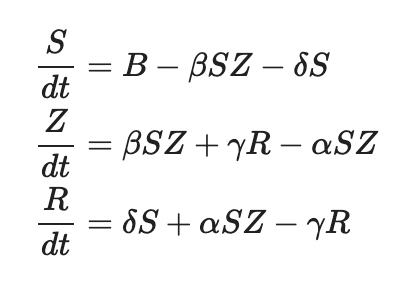

 
 
 
 
Where $S$ is the number of susceptible humans,$Z$  is the number of zombies and $R$ is the number of removed persons which have died either by natural causes or zombie attack. The human birthrate is assumed to be constant and modeled by $B$

Susceptibles can become zombies through an encounter with a zombie ($\beta$). Natural causes of human deaths are parameterized by $\delta$ . Humans in the removed class can be resurrected and become zombies ($\gamma$).
Zombies can enter the removed class by cutting their heads of or removing their brains ($\alpha$)

The question I'm trying to answer is

Can Humanity survive the zombie Apocalypse?

Since I don't know how to solve differential equations, I'm going to use SciPy instead.

Now we use SciPy to solve this system of differential equations. The function solve_ivp does the entire job for us.

If we go to the SciPy documentation about this function we will read the following.

This function numerically integrates a system of ordinary differential equations given an initial value:

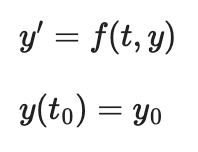

Here,(𝑡)is a one-dimensional independent variable (time), is an n-dimensional vector-valued function (state), and an n-dimensional vector-valued function   $f(t, y)$ determines the differential equations. The goal is to find y(t) approximately satisfying the differential equations, given an initial value $y(to)=yo$.
So we start by defining some starting values for the problem and the model function $f(t,y)$ .

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import solve_ivp

__*Solve an initial value problem for a system of ODEs. This function numerically integrates a system of ordinary differential equations given an initial value: $dy / dt$ = $f(t, y);   y(to) = yo$*__

In [34]:
# ODE - Ordinary Differential Equation
# Let's define the initial fixed parameters.

B = 0.1 # birth rate
delta = 0.0001 # rate of natural casues of death
beta = 0.00019 # transmission coefficent
gamma = 0.0001 # resurrection rate
alpha = 0.0001 # rate of zombies killed

# initial conditions
S0 = 1200              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial dead population
y0 = [S0, Z0, R0]     # initial condition vector


def survival_model(t, y):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    # define the above mentioned equations.
    f0 = B - beta * Si * Zi - delta * Si
    f1 = beta * Si * Zi + gamma * Ri - alpha * Si * Zi
    f2 = delta * Si + alpha * Si * Zi - gamma * Ri
    return [f0, f1, f2]

In [43]:
# Now we solve the equation and output the result
t_s, t_e = 0, 300  # 300 days of zombie apocalypse
solution = solve_ivp(survival_model, (t_s, t_e), y0, t_eval=np.linspace(t_s, t_e, 300))

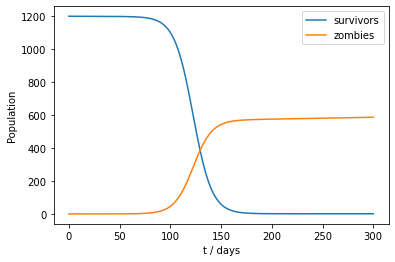

In [44]:
s = solution.y[0, :]
z = solution.y[1, :]
plt.plot(solution.t, s, label='survivors')
plt.plot(solution.t, z, label='zombies')
plt.xlabel('t / days')
plt.ylabel('Population')
plt.legend()

### Let's try to save humanity

__The ODE defined above is a very pessimistic model. There is one unstable equilibrium state if $\beta$ = 0 . Our task is to save the world by adding a the notion of a cure(Recovery) to the model above. The cure(Recovery) can move individuals from the  to the  group.__

__*Introduce a new constant  which models the effectivness of the cure(Recovery).
Add a term to the ODE to model the cure(Recovery).
Solve the ODE using solve_ivp*__

In [45]:
# ODE - Ordinary Differential Equation
# Let's define the initial fixed parameters.

B = 0.1 # birth rate
delta = 0.0001 # rate of natural casues of death
beta = 0.00019 # transmission coefficent
gamma = 0.0001 # resurrection rate
alpha = 0.0001 # rate of zombies killed
rho = 0.02 # rate of recovery (curve from the zombie Virus)

# initial conditions
S0 = 1200              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial dead population
y0 = [S0, Z0, R0]     # initial condition vector


def survival_model(t, y):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    # define the above mentioned equations.
    f0 = B - beta * Si * Zi - delta * Si + Zi * rho # adding cured zombies
    f1 = beta * Si * Zi + gamma * Ri - alpha * Si * Zi - Zi * rho # subtracting cured zombies
    f2 = delta * Si + alpha * Si * Zi - gamma * Ri
    return [f0, f1, f2]

In [48]:
# Now we solve the equation and output the result
t_s, t_e = 0, 500  # 500 days of zombie apocalypse
solution = solve_ivp(survival_model, (t_s, t_e), y0, t_eval=np.linspace(t_s, t_e, 500))

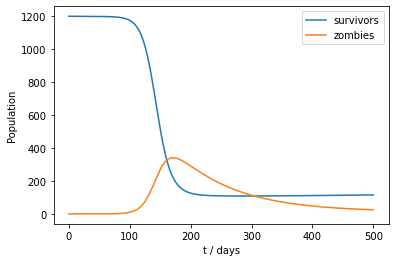

In [49]:
s = solution.y[0, :]
z = solution.y[1, :]
plt.plot(solution.t, s, label='survivors')
plt.plot(solution.t, z, label='zombies')
plt.xlabel('t / days')
plt.ylabel('Population')
plt.legend()

# Waaaaaa !!!!!!! we saved ourselfs from the deadly zombie applocipes.........
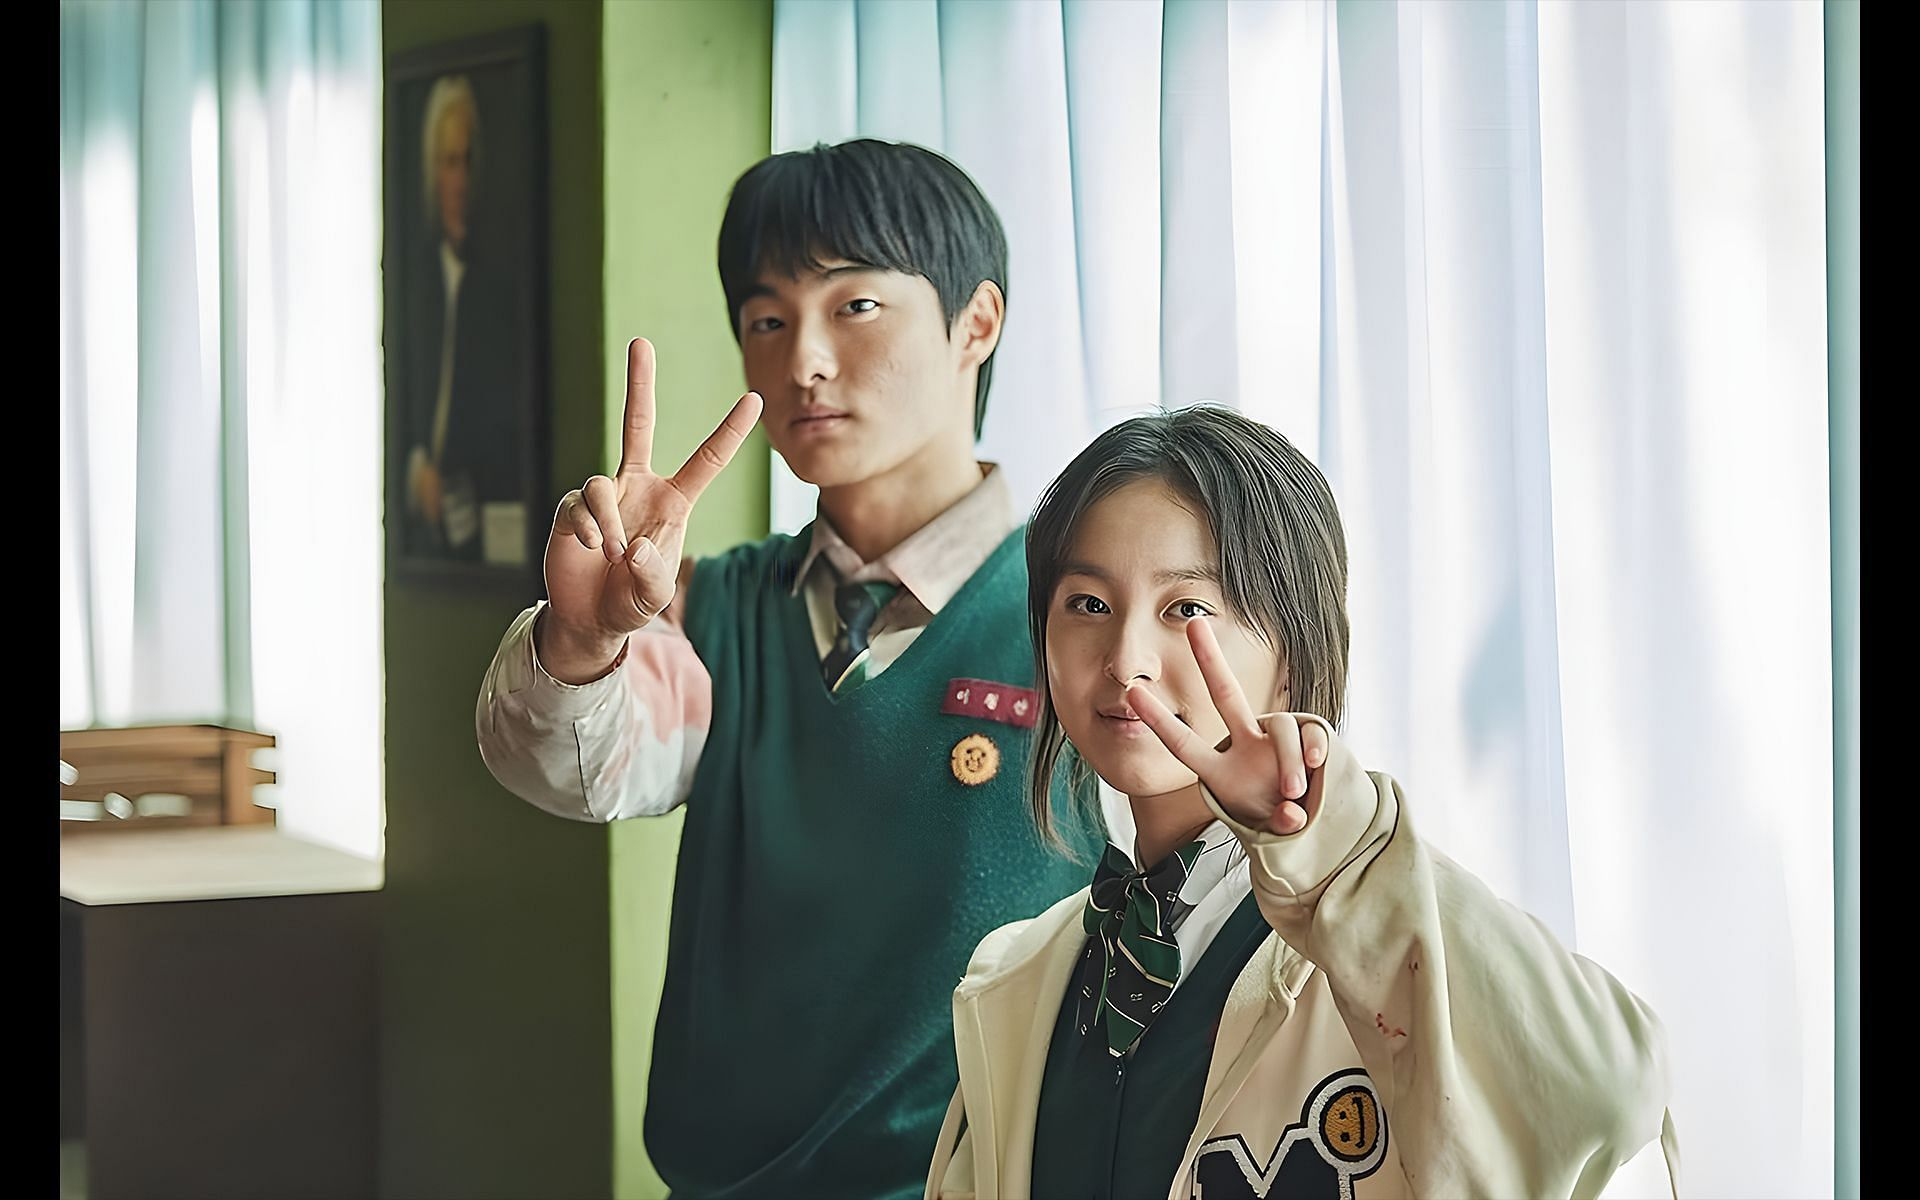
__BUt x3 ; some thing is coming__        __LOOK UP__

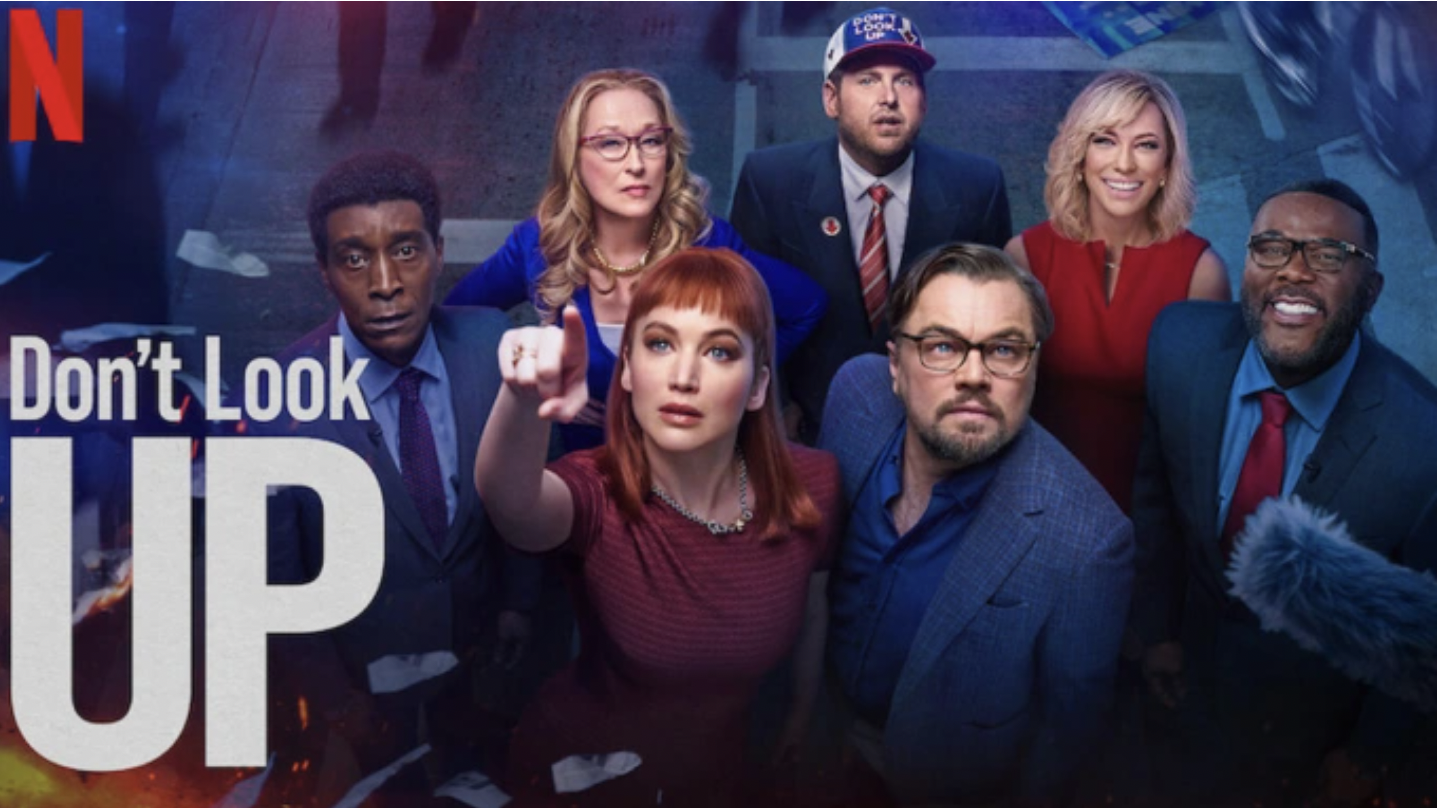